In [1]:
from pix2pix_faces.model import Generator
from PIL import Image

import torch
import torchvision

import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Instanciar generador y cargar modelo
generator = Generator(3,3)
state = torch.load('modelos/face2pixel.pth', map_location='cpu')
generator.load_state_dict(state['generator'])

In [55]:
# Cargar imagen:
name = 'pix2pix_faces/image2.jpeg'
inp_im = Image.open(name)

In [56]:
transform = transforms = torchvision.transforms.Compose([
             torchvision.transforms.Resize((286,286)),
             torchvision.transforms.ToTensor()])

In [57]:
# Aplicar transformaciones en la imagen de entrada.
inp_im = transform(inp_im)

In [58]:
# Generar imagen de salida.
out_im = generator(inp_im.view(1,3,286,286))

In [59]:
# Devolver las imagenes a objetos de numpy
inp_im = inp_im.data.numpy().transpose(1,2,0)
out_im = out_im[0].data.numpy().transpose(1,2,0)

# Imagen diferencia entre las imagenes
diff = np.abs(inp_im - out_im)
max_diff, min_diff = np.amax(diff), np.amin(diff)
diff = (diff - min_diff) / (max_diff - min_diff)

diff = np.abs(diff - .5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


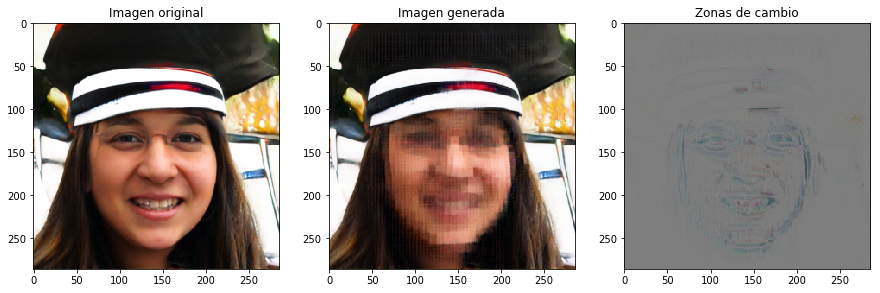

In [60]:
fig, ax = plt.subplots(1,3, figsize=(15,15))

ax[0].set_title('Imagen original')
ax[0].imshow(inp_im)

ax[1].set_title('Imagen generada')
ax[1].imshow(out_im)

ax[2].set_title('Zonas de cambio')
ax[2].imshow(diff)
fig.savefig('not-exist.pdf')
plt.show()